# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Solution:

Let's first compute

$$
\frac{ \frac{\partial^2}{\partial x^2} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

recall that

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

therefore

$$
\frac{\partial}{\partial x} \Psi_T^{\sigma,\mu}(x) \propto -\frac{(x-\mu)}{\sigma^2} 
                                                           e^{-\frac{(x-\mu)^2}{2\sigma^2}}
                                                           -\frac{(x+\mu)}{\sigma^2}
                                                           e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$$
\frac{\partial^2}{\partial x^2} \Psi_T^{\sigma,\mu}(x) \propto -\frac{1}{\sigma^2} 
                                                               e^{-\frac{(x-\mu)^2}{2\sigma^2}}
                                                               -\frac{1}{\sigma^2}
                                                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
                                                               +\frac{(x-\mu)^2}{\sigma^4} 
                                                               e^{-\frac{(x-\mu)^2}{2\sigma^2}}
                                                               +\frac{(x+\mu)^2}{\sigma^4}
                                                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

and it is immediately evident that the first two terms are proportional to $\Psi$, and this first part of the equation can be trivially written in terms of $\Psi$. The same is true for the $x^2$ and $\mu^2$ terms of the second part. However, when we consider the $2x\mu$ terms, we find a minus sign. So a deeper analysis is needed:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{x^2 - 2x\mu + \mu^2}{2\sigma^2}}+
                               e^{-\frac{x^2 + 2x\mu + \mu^2}{2\sigma^2}}
                             = e^{-\frac{x^2 + \mu^2}{2\sigma^2}}
                               \left( e^{\frac{x\mu}{\sigma^2}} + e^{-\frac{x\mu}{\sigma^2}} \right)
                             = e^{-\frac{x^2 + \mu^2}{2\sigma^2}}
                               \left( 2 \cosh{\frac{x\mu}{\sigma^2}} \right)
$$

$$
\frac{\partial^2}{\partial x^2} \Psi_T^{\sigma,\mu}(x) = \frac{x^2+\mu^2-\sigma^2}{\sigma^4} \Psi_T^{\sigma,\mu}(x)
                                                       -\frac{2x\mu}{\sigma^4} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
                                                       +\frac{2x\mu}{\sigma^4} e^{-\frac{(x+\mu)^2}{2\sigma^2}}
                                                       = \frac{x^2+\mu^2-\sigma^2}{\sigma^4} \Psi_T^{\sigma,\mu}(x)
                                                       -\frac{2x\mu}{\sigma^4} e^{-\frac{x^2+\mu^2}{2\sigma^2}}
                                                       \left(2 \sinh{\frac{x\mu}{\sigma^2}} \right)
$$

and finally

$$
\frac{ \frac{\partial^2}{\partial x^2} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} = \frac{x^2+\mu^2-\sigma^2}{\sigma^4} - \frac{2x\mu}{\sigma^4} \tanh{\frac{x\mu}{\sigma^2}}
$$

Now I can use this result to write an explicit formula for $\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$. Consider a classical Hamiltonian:

$$ \hat H = \frac{p^2}{2m} + \hat V(x) = - \frac{\ \hbar^2}{2m} \frac{\partial^2}{\partial x^2} + \hat V(x)$$

using $\hbar = m = 1$ and substituting our formula for $\hat V(x)$:

$$ \hat H = -\frac 1 2 \frac{\partial^2}{\partial x^2} + x^4 - \frac 5 2 x^2$$

which means

$$\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = - \frac{x^2+\mu^2-\sigma^2}{2\sigma^4} + \frac{x\mu}{\sigma^4} \tanh{\frac{x\mu}{\sigma^2}} + x^4 - \frac 5 2 x^2$$

I can now compute the following integral:

$$
\langle {\hat H} \rangle_T = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

by sampling the trial function using Metropolis. This will give a collection of points on the $x$ axis with pdf:

$$ \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} $$

and it will suffice to compute the average value of $\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$ with these points.

I wrote a function that computes this integral using $M(RT)^2$, using $10^4$ random walk steps divided in $100$ blocks of size $100$. The step length has been calibrated doing $50$ trials, using all the possible step lengths starting from $0.1$ and finishing at $5.0$ (each time increasing the step length by $0.1$), similarly to what was done in L05. The calibration was performed using $\sigma=\mu=1.0$, under the assumption that the best step length in this condition also satisfies the $50\%$ rule across the entire parameter space.

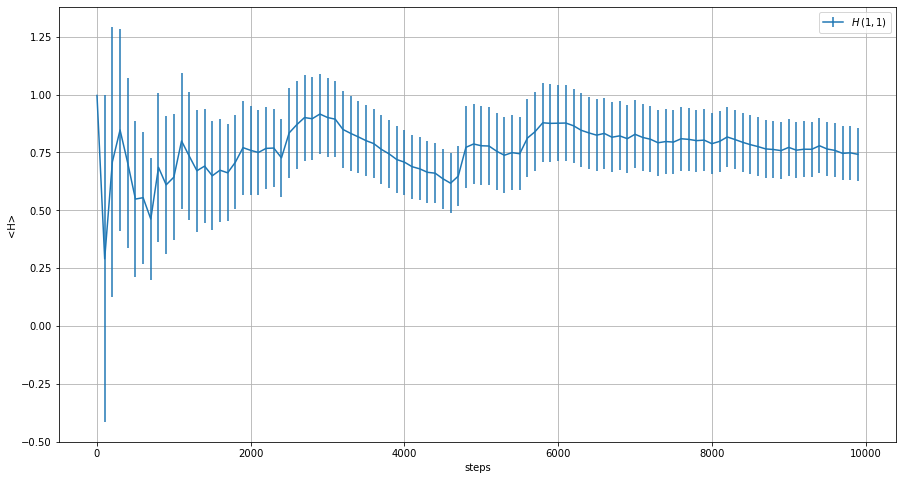

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

df = pd.read_csv('output_calibration.dat', delimiter='\t', header=None, names=['H', 'sigma'])

#print(df)

N=len(df['H'])
L=100
x = np.arange(N)      # [0,1,2,...,N-1]
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.figure(figsize=(15,8))
plt.errorbar(x, df['H'], yerr=df['sigma'], alpha=1.0, label='$H\,(1,1)$')
plt.xlabel('steps')
plt.ylabel('<H>')
plt.grid(True)
plt.legend()
plt.show()

with step length $3.6$

In [2]:
def expo(x, tau):
    return np.exp(-x/tau)

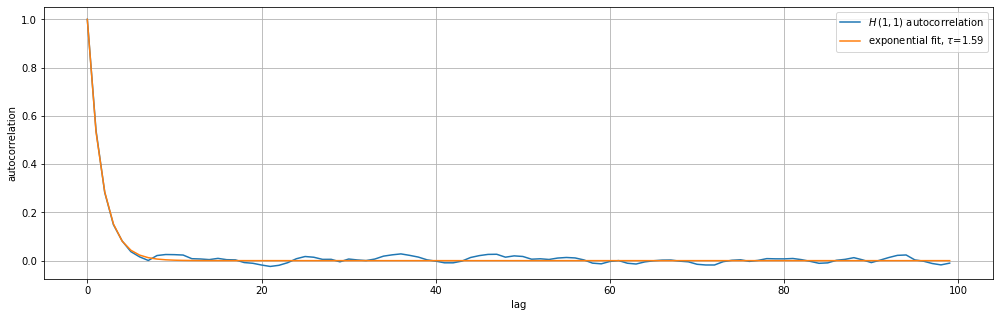

In [3]:
from scipy.optimize import curve_fit

dfa = pd.read_csv('output_autoc.dat', delimiter='\t', header=None, names=['H'])
#print(dfa)

lag = np.arange(len(dfa['H']))
fit, cov = curve_fit(expo, lag, dfa['H'])
fit=fit[0]

plt.figure(figsize=(17,5))
plt.plot(dfa['H'], alpha=1.0, label='$H\,(1,1)$ autocorrelation')
plt.plot(lag, expo(lag, fit), label=r'exponential fit, $\tau$=' + f'{fit:.2f}')
plt.xlabel('lag')
plt.ylabel('autocorrelation')
#plt.xlim((0,500))
plt.grid(True)
plt.legend()
plt.show()

The autocorrelation function fits an exponential function $\exp{\{-x/\tau\}}$ with $\tau \approx 1.6$, which means the chosen blocksize of $100$ is more than enough to avoid correlation problem.

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### Solution:

As a starting temperature I chose $\beta = 0.001$. This value doubles every $100$ steps, and doubles $20$ times, for a grand total of $2000$ SA steps. This means that the final temperature is $\beta = 1048.58$. Starting on $\sigma = \mu = 1.0$, I used a uniform transition probability in 2D space with step length $0.2$.

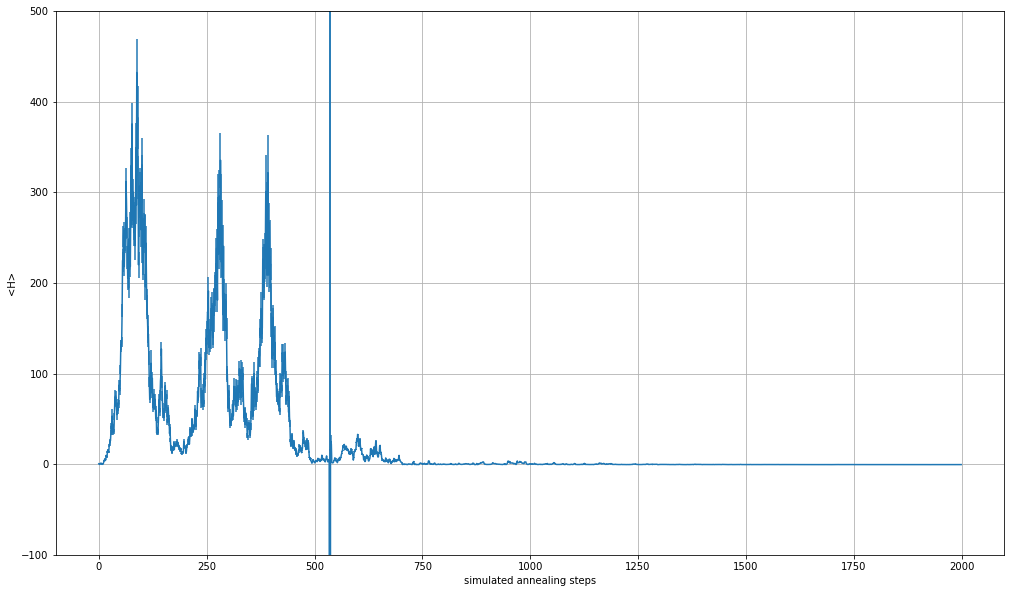

In [4]:
df = pd.read_csv('output.dat', delimiter='\t', header=None, names=['mu', 'sigma', 'H', 'H_sigma'])

N=len(df['H'])
x = np.arange(N)      # [0,1,2,...,N-1]

plt.figure(figsize=(17,10))
plt.errorbar(x, df['H'], yerr=df['H_sigma'], alpha=1.0, label='$H$')
plt.xlabel('simulated annealing steps')
plt.ylabel('<H>')
#plt.xlim((600,2000))
plt.ylim((-100,500))
plt.grid(True)
#plt.legend()
plt.show()

zooming in:

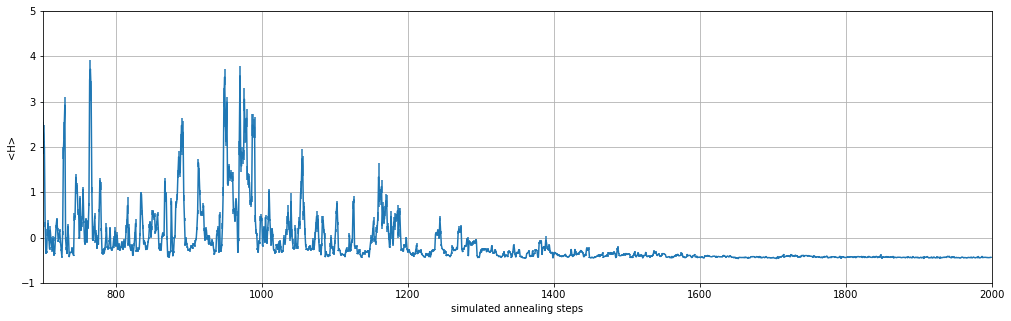

In [5]:
plt.figure(figsize=(17,5))
plt.errorbar(x, df['H'], yerr=df['H_sigma'], alpha=1.0, label='$H$')
plt.xlabel('simulated annealing steps')
plt.ylabel('<H>')
plt.xlim((700,2000))
plt.ylim((-1,5))
plt.grid(True)
#plt.legend()
plt.show()

zooming in some more:

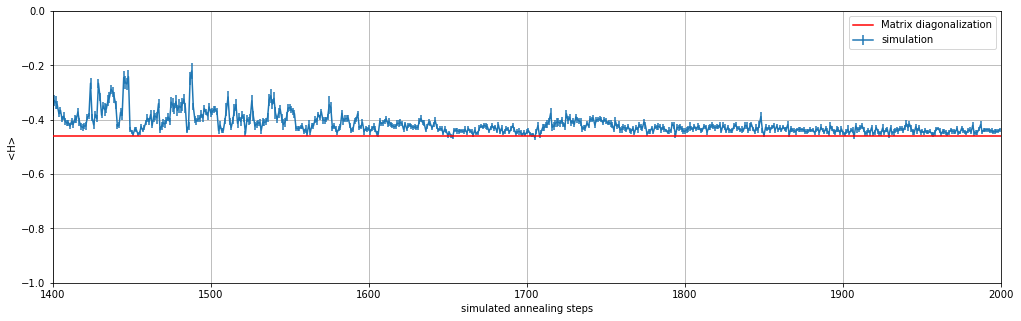

In [6]:
plt.figure(figsize=(17,5))
plt.errorbar(x, df['H'], yerr=df['H_sigma'], alpha=1.0, label='simulation')
plt.axhline(y=-0.4604658796927155, color='red', label='Matrix diagonalization', linestyle='-', zorder=3)
plt.xlabel('simulated annealing steps')
plt.ylabel('<H>')
plt.xlim((1400,2000))
plt.ylim((-1,0))
plt.grid(True)
plt.legend()
plt.show()

The value obtained using the simulated annealing algorithm is a bit greater than the real value, as expected. The algorithm finds a minimum at $\mu_{min} = 0.751428$ and $\sigma_{min} = 0.627022$.

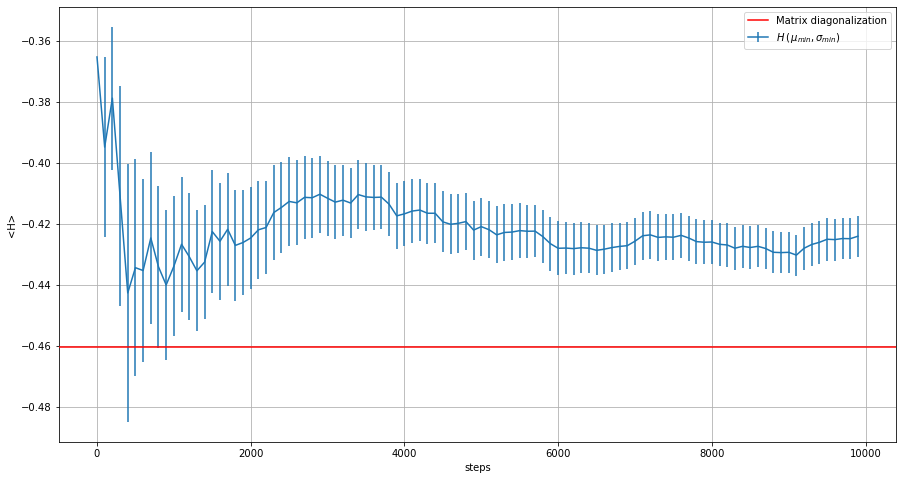

In [7]:
dff = pd.read_csv('output_final.dat', delimiter='\t', header=None, names=['H', 'sigma'])

#print(df)

N=len(dff['H'])
L=100
x = np.arange(N)      # [0,1,2,...,N-1]
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.figure(figsize=(15,8))
plt.errorbar(x, dff['H'], yerr=dff['sigma'], alpha=1.0, label='$H\,(\,\mu_{min}, \sigma_{min})$')
plt.axhline(y=-0.4604658796927155, color='red', label='Matrix diagonalization', linestyle='-', zorder=3)
plt.xlabel('steps')
plt.ylabel('<H>')
plt.grid(True)
plt.legend()
plt.show()

Ground state energy:  -0.4604658796927155
1st excited state energy:  0.09742471331761006
2nd excited state energy:  1.9717331343930213


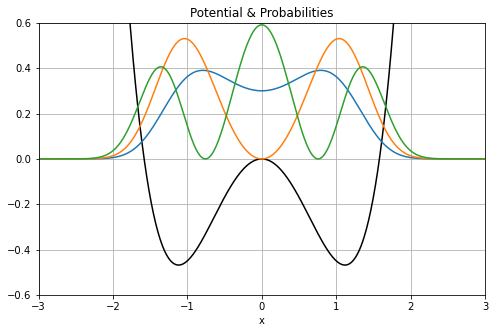

In [8]:
# Legacy code

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

#End legacy

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

<IPython.core.display.Javascript object>


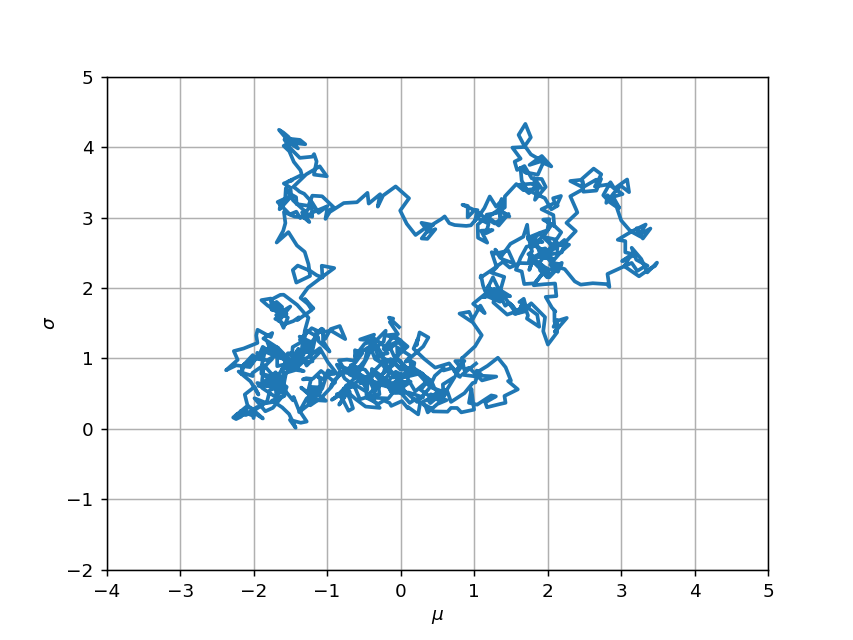

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
        
mu = df['mu'].to_numpy()
sigma = df['sigma'].to_numpy()

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(-4, 5)
ax.set_ylim(-2, 5)
#ax.set_title("Random walk path in parameter space")
ax.grid()
ax.set_xlabel("$\mu$")
ax.set_ylabel("$\sigma$")

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(mu[:frame], sigma[:frame])
    return line,

anime = animation.FuncAnimation(fig, update, frames=len(mu), init_func=init, blit=True, interval=30)

plt.show()

#anime.save('animation.mp4')